<a href="https://colab.research.google.com/github/altaf1444/Capstone_EDA_Project/blob/main/AirBnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - AirBnb Booking Analysis**



##### **Project Type**    - ***EDA***
##### **Contribution**    - ***Team***
##### **Team Member 1 -**  ***Altaf Shaikh***
##### **Team Member 2 -**  ***Priti Singh***


# **Project Summary**


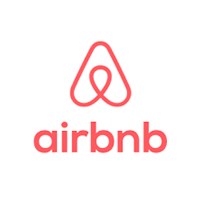
* The purpose of the analysis: Understanding the factors that influence Airbnb prices in New York City, or identifying patterns of all variables and Our analysis provides useful information for travelers and hosts in the city and also provides some best insights for Airbnb business.

* This project involved exploring and cleaning a dataset to prepare it for analysis. The data exploration process involved identifying and understanding the characteristics of the data, such as the data types, missing values, and distributions of values. The data cleaning process involved identifying and addressing any issues or inconsistencies in the data, such as errors, missing values, or duplicate records and remove outliers.

* Through this process, we were able to identify and fix any issues with the data, and ensure that it was ready for further analysis. This is an important step in any data analysis project, as it allows us to work with high-quality data and avoid any potential biases or errors that could affect the results. The clean and prepared data can now be used to answer specific research.

* Once the data has been cleaned and prepared, now begin exploring and summarizing it with describe the data and creating visualizations, and identifying patterns and trends in the data. in explore the data, may develop the relationships between different variables or the underlying causes of certain patterns or trends and other methods.

* Using data visualization to explore and understand patterns in Airbnb data. We created various graphs and charts to visualize the data, and wrote observations and insights below each one to help us better understand the data and identify useful insights and patterns.

* Through this process, we were able to uncover trends and relationships in the data that would have been difficult to identify through raw data alone, for example factors affecting prices and availability. We found that minimum nights, number of reviews, and host listing count are important for determining prices, and that availability varies significantly across neighborhoods. Our analysis provides useful information for travelers and hosts in the city.

* The observations and insights we identified through this process will be useful for future analysis and decision-making related to Airbnb. and also Our analysis provides useful information for travelers and hosts in the city.
















# **GitHub Link -**

https://github.com/altaf1444/Capstone_EDA_Project.git

# **Problem Statement**


1. Finding which neighbourhood has the highest bookings.

2. Finding who owns the maximum number of properties.

3. Finding out the room type distribution.

4. Finding the maximum neighbourhood distribution.

5. Finding which property is popular among customers.

6. Finding price distribution according to room type.

7. Finding which is the most densely populated neighbourhood.

8. Finding the most expensive neighbourhood.

9. Finding the cheapest neighbourhood.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
Airbnb_data = pd.read_csv('/content/drive/My Drive/Project-1/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
Airbnb_data.head(10)


In [ ]:
Airbnb_data.tail(10)

### Dataset Rows & Columns count

In [ ]:
num_rows, num_columns = Airbnb_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

**There are 48895 rows & 16 columns in AirBnb data set**

### Dataset Information

In [ ]:
Airbnb_data.info()

**From the above info we found that host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.**

**While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables**

#### Duplicate Values

In [ ]:
dup_val_count = Airbnb_data.duplicated().value_counts()
dup_val_count

**The above result: False means there were no duplicate values in 48895 rows**

#### Missing Values/Null Values

In [ ]:
missing_values_count = Airbnb_data.isnull().sum()
missing_values_count

In [ ]:
plt.figure(figsize=(10,6))
missing_values_count.plot(kind = 'bar',color = 'red' )
plt.title('Missing Values by Column')
plt.xlabel('Columns', color = 'red', size = 15)
plt.ylabel('Count of Missing Values', color = 'red', size = 15)
plt.xticks(rotation=75)
plt.show()

From the above bar plot we can clearly see :

There are **16** values in **name** & **21** values in **host_id** columns.

The major missing values are in **last_review** & **reviews_per_month** viz. **10052** each.

### What did you know about your dataset?

**1.** This Airbnb dataset contains 48895 rows with 16 columns of booking data of the AirBnb's in New York.

**2.** The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

**3.** This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

**4.** Based on the findings till now it can be concluded that the Airbnb dataset gives a glimpse of the kind of the data that can be fetched.

**5.** We can have a clear idea from the dataset, what kind of information is stored, how many rows and columns are there, how many null values are there etc.

**6.** Many columns in dataset hold null values. We have tried to find the null values in each column, last_review and reviews_per_month column having the most no.of nulls whereas name and hostname column having the least.

**7.** **last_review** and **reviews_per_month** column has NaN in the same rows stating that these 2 columns share some sort of correlation. Moreover **last_review** column is not important as much as **reviews_per_month** column, so we can drop it and fill NaN in **reviews_per_month** with 0.

**8.** NaN in name and host_name column are very less in number hence we can replace it with unknown in both the columns.

**9.** As data cleaning requires replacing null values but replacing null values can sometime mislead the dataset.
So, it must be worked upon cautiously only were its required.

## ***2. Understanding Your Variables***

In [ ]:
Airbnb_data.columns

In [ ]:
Airbnb_data.describe()

### Variables Description

**Variable list :**

**id** :- This is a unique identifier for each listing in the dataset.

**name** :- This is the name or title of the listing, as it appears on the Airbnb website.

**host_id** :- This is a unique identifier for each host in the dataset.

**host_name** :- This is the name of the host as it appears on the Airbnb website.

**neighbourhood_group** :- This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

**neighbourhood** :- This is the specific neighborhood in which the listing is located.

**latitude** :- This is the geographic latitude of the listing.

**longitude** :- This is the geographic longitude of the listing.

**room_type** :- This is the type of room or property being offered, such as an entire home, private room, shared room.

**price** :- This is the nightly price for the listing, in US dollars.

**minimum_nights** :- This is the minimum number of nights that a guest must stay at the listing.

**total_reviews** :- This is the total number of reviews that the listing has received.

**reviews_per_month** :- This is the average number of reviews that the listing receives per month.

**calculated_host_listings_count** :- This is the total number of listings that the host has on Airbnb.

**availability_365** :- This is the number of days in the next 365 days that the listing is available for booking.

### Check Unique Values for each variable.

In [ ]:
print("Unique values in ['id']                             :", Airbnb_data["id"].nunique())
print("Unique values in ['host_id']                        :", Airbnb_data["host_id"].nunique())
print("Unique values in [latitude']                        :", Airbnb_data["latitude"].nunique())
print("Unique values in ['longitude']                      :", Airbnb_data["longitude"].nunique())
print("Unique values in ['price']                          :", Airbnb_data["price"].nunique())
print("Unique values in ['minimum_nights']                 :", Airbnb_data["minimum_nights"].nunique())
print("Unique values in ['number_of_reviews']              :", Airbnb_data["number_of_reviews"].nunique())
print("Unique values in ['reviews_per_month']              :", Airbnb_data["reviews_per_month"].nunique())
print("Unique values in ['calculated_host_listings_count'] :", Airbnb_data["calculated_host_listings_count"].nunique())
print("Unique values in ['availability_365']               :", Airbnb_data["availability_365"].nunique())



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# removed duplicate rows if any
Airbnb_data.drop_duplicates(inplace=True)

# filled all NaN with 0 since we don't have any review in few of the months
Airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

# droping off this column as it has many null values and not it's not required
Airbnb_data.drop("last_review", axis=1, inplace=True)

# replacing NaN with "unknown" in both "name" & "host_name" columns
Airbnb_data["name"].fillna("unknown", inplace=True)

Airbnb_data["host_name"].fillna("unknown", inplace=True)

# calculating the mean price
mean_price = Airbnb_data["price"].mean()

#replace price 0 with mean value
Airbnb_data.replace(0, mean_price, inplace=True)

Airbnb_data.isna().sum()

In [ ]:
Airbnb_data.shape

**As we can see in the above output, null values has been replaced**

### What all manipulations have you done and insights you found?

* We have done data wrangling on the previous dataset provided which had some missing values.
* As we initiated drop_duplicates() method but didn't find any duplicate values in the dataset.
* Then we performed isnull() to find null values and concluded that we have 4 columns with some null values.
* For name and host_name column replaced NaN with unknown as null values are very less in number. We could have dropped the columns but it would then remove some meaningful data as well.
* We then replaced the null values in reviews_per_month column with 0 as it didn't impact the meaning of dataset.
* Since last_review has numerous null values and the info contained in it is almost there in reviews_per_momth column, so we dropped it off.
* We made changes in "price" column, since property can't be available at 0 price. So, we replaced all price 0 with mean price value.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 >> Most Booked Properties [Top 5]

In [ ]:
counts = Airbnb_data['neighbourhood_group'].value_counts()

Top_Neighborhood_group = counts.reset_index()

Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']

Top_Neighborhood_group

In [ ]:
hotel_name = Airbnb_data["neighbourhood_group"].value_counts().head(5)
hotel_name

colors = ['orange','violet','red','green','blue']

plt.bar(hotel_name.index, hotel_name.values, color=colors, edgecolor = 'black' )
plt.title("Top 5 Most booked Neighbourhood", fontsize = 15, color = 'r')
plt.xlabel("Neighbourhood Group", fontsize = 15, color = 'r')
plt.ylabel("Number of Bookings", fontsize = 15, color = 'r')
plt.show()

##### 1. Why did you pick the specific chart?

* We picked bar plot to describe this data because it can describe the most booked neighbourhood data in a very discrete manner.

##### 2. What is/are the insight(s) found from the chart?

**From the above chart we have deducted following data:**

**Manhattan** : 21661 bookings

**Brooklyn** : 20104 bookings

**Queens** : 5666 bookings

**Bronx** : 1091 bookings

**Staten Island** : 373 bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We can figure out from the bar graph that Manhattan is the most visited/booked property whereas Staten Island is the least booked. This will eventually give users an idea about the popularity of properties and hence assist them in making right choice during booking.

* This deducted insight will definitely not just benefit users in their decision making while booking for a property but in return it will also benefit property owners to know about the users perspective regarding their property. The property owner with least bookings will also try to figure out the root cause of such less bookings.

#### Chart - 2 >> Owner with maximum number of properties

In [ ]:
top_10_hosts = Airbnb_data['host_name'].value_counts()[:10].reset_index()

top_10_hosts.columns = ['host_name', 'Total_listings']

top_10_hosts

In [ ]:
most_host = Airbnb_data["host_name"].value_counts().head(10)

colors = ['#FF5733', '#33FF57', '#5733FF', '#33FFFF',
          '#FF33AA', '#FFAA33', '#33AAFF', '#AA33FF',
          '#33FFAA', '#AAFF33'
          ]

plt.barh(most_host.index, most_host.values, color = colors, edgecolor = 'black')

plt.xlabel("Numbers",fontsize = 15, color = 'r')
plt.ylabel("Host Name",fontsize = 15, color = 'r')
plt.title("Owner with maximum Properties",fontsize = 15, color = 'r')

plt.show()

##### 1. Why did you pick the specific chart?

According to us the Horizontal Bar Plot is perfect to demonstrate this type of data so used.

##### 2. What is/are the insight(s) found from the chart?

* This specific chart gives an understanding of the host with maximum property available.

* Michael has maximum number of properties i.e. 417 followed by David with 403.

#### Chart - 3 >> Room Type Distribution

In [ ]:
room = Airbnb_data["room_type"].value_counts()

plt.pie(room.values, autopct='%1.1f%%', labels=room.index)

plt.title("Room type distribution", fontsize = 15, color = 'r')

plt.show()

##### 1. Why did you pick the specific chart?


* The motive of selecting this specific chart is to get a clear picture of room_type distribution.

##### 2. What is/are the insight(s) found from the chart?

**From the above chart we can say that % share of different types of room_type distribution is as follows:**

**Entire home/apt** has the maximum distribution nearly **52%**.

**Private room** being the second highest in terms of % distribution with **45.7%**.

**Shared room** having the least distribution with **2.4%**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes the gained insight will surely create a positive business impact as user will get to know which room type is in great demand and which one is in least demand.

* Moreover buisness owner will also be benefited to know more about the room type, if any owner wants to add new property in future then it will help the owner to choose the right room type to build.

#### Chart - 4 >> Neighbourhood Distribution

In [ ]:
neigh= Airbnb_data["neighbourhood"].value_counts()
neigh

top21_neigh = neigh.head(21)

colors = ["yellow", "pink"]

plt.barh(top21_neigh.index, top21_neigh.values, color=colors, edgecolor = 'black')

plt.xlabel("Numbers",fontsize = 15, color = 'r')
plt.ylabel("Neighbourhood",fontsize = 15, color = 'r')
plt.title("Neighbourhood Distribution",fontsize = 15, color = 'r')

plt.show()

##### 1. Why did you pick the specific chart?

* The above chart serves motive of understanding neighbourhood distribution, which neighbour is most likely visited & how many unique neighbours are there in dataset etc.

##### 2. What is/are the insight(s) found from the chart?

**We can forcast following insight from above data:**

**1.** There are in total 221 unique neighbours.

**2.** Out of 221 unique neighbours we extracted out top 21 most visited neighbours to understand the tendency of occupancy.

**3.** Williamsburg has made most no.of visits which is 3920 followed by Bedford-Stuyvesant which is 3714.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**1.** To very much extend the gained insight will resemble business impact in positive direction. As the data depicts the density or occupancy of neighbourhood.

**2.** Williamsburg being the busiest followed by Bedford-Stuyvesant

**3.** From the figure it can be concluded that the neighbourhood with most in number is likely to be the busiest one.

#### Chart - 5 >> Top 20 properties popular amongst customers

In [ ]:
name = Airbnb_data["name"].value_counts().head(20)

plt.barh(name.index, name.values, color = 'blue', edgecolor = 'black')

plt.xlabel("Numbers", fontsize = 15,color = 'r')
plt.ylabel("Name of Property",fontsize = 15,color = 'r')
plt.title("Top 20 Properties",fontsize = 15,color = 'r')

plt.show()

##### 1. Why did you pick the specific chart?

* The logic of using bar chart is to show which of the Property_name being majorly used or we can say popular amongst customers.

##### 2. What is/are the insight(s) found from the chart?

**We have deduced follwing data from above chart:**

**1.** Hillside Hotel is highest in number i.e, with count 18, which clearly gives an indication that it is most popular property amongst customers.

**2.** Home away from home shows second most popular property amongst customers.

#### Chart - 6 >> Price ditribution as per category of room

In [ ]:
def count(price):
  if price < 50:
    return "Cheap"
  elif price >= 50 and price <= 400:
    return "Affordable"
  else:
    return "Expensive"


sns.countplot(x=Airbnb_data["price"].apply(count))

plt.title("Price ditribution as per category of room", fontsize = 15, color = 'r')

plt.show()

##### 1. Why did you pick the specific chart?

* Reason of selecting countplot chart is to get a clear overview of how price distribution is done based on room type.

##### 2. What is/are the insight(s) found from the chart?

**Following points can be highlighted from above graph:**

**1.** Affordable property is pretty huge in number.

**2.** Cheap property is less than affordable but slightly more than expensive.

**3.** Expensive property is very less in number.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The analysis do create a positive business impact understanding customer behaviour towards booking.

* The stats show it all that customers prefer to book afforadable property rather than cheap and expensive.

* The point here is to focus on that customers are less inclined towards cheap and expensive property which leaves a scope to think upon for host.

#### Chart - 7 >> Most populated neighbourhood_group

In [ ]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(data=Airbnb_data, x="longitude", y="latitude", hue="neighbourhood_group")

plt.title("Neighbourhood group distribution",fontsize = 15,color = "r")

plt.show()

##### 1. Why did you pick the specific chart?

* The reason behind selecting scatterplot is to understand how dense the neighbourhood is in neighbourhood_group based on longitude & latitude.

##### 2. What is/are the insight(s) found from the chart?

* **Brooklyn** and **Manhattan** are the most dense **neighborhood_group**, followed by **Queens**.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The insight gained will help to create positive impact on business as it gives an overview of how densly populated the neighbourhood_group is.

* Staten island and bronx has the least populated neighborhood_group, so there is a need to work on these 2 for better outcomes.

#### Chart - 8 >> Top 10 Expensive and Cheap Neighbourhoods

In [ ]:
temp= Airbnb_data.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x="price", y="neighbourhood", data=temp[-10:],
            label="Total", color='r').set(xlabel='Average Price')
plt.title('TOP 10 EXPENSIVE NEIGHBOURHOOD BASED ON THE AVERAGE PRICE',
          fontsize = 15, color = 'r')
plt.show()

In [ ]:
sns.barplot(x="price", y="neighbourhood", data=temp[:10],
            label="Total", color="green").set(xlabel='Average Price')
plt.title('Top 10 cheapest neighbourhoods based on average price',
          fontsize = 15, color = "r")
plt.show()

##### 1. Why did you pick the specific chart?

* The reason to select this chart is that it shows detailed analysis of both top 10 expensive and top 10 least expensive neighbourhoods based on average price.

##### 2. What is/are the insight(s) found from the chart?

**Top 10 expensive neighbourhood:**
1. Fort Wadsworth is the top expensive neighbourhood based on average price.
2. Woodrow is the second most expensive neighboorhood.

**Top 10 least expensive:**

1. Concord is the cheapest neighbourhood based on average price.
2. Second most cheap neighbourhood is Castle Hill.

#### Chart - 9 - Correlation Heatmap

In [ ]:
sns.heatmap(data=Airbnb_data.corr(), annot= True)

plt.title("Overall detailed analysis", fontsize = 15, color = 'r')

plt.show()

##### 1. Why did you pick the specific chart?

* The selection of heatmap chart is to give a clear insight of how each and every series in the data set are linked to each other, how collaborative are the bonds and how loose are they.

##### 2. What is/are the insight(s) found from the chart?

**Following output can be depicted from analysis shared above:**

* The one's with lightest color and indicated with numeric value 1 shares the strongest bond i.e., the series when compared with itself serves the deep collaboration.

* As the color keeps to darken, the strength of the bonds keeps on deteriorating and the numeric values justifies it all.

* The series who's joint venture depicts the darkest color and have least numeric value claims to have the weakest bond.

#### Chart - 10 - Pair Plot

In [ ]:
final_plot = Airbnb_data.loc[:, ["price", "minimum_nights", "calculated_host_listings_count", "number_of_reviews", "reviews_per_month", "availability_365"]]

sns.pairplot(data=final_plot.corr())

plt.title("Correlation Analysis")

plt.show()

##### 1. Why did you pick the specific chart?

* The motive of selecting pair plot is to get a summarized insight of relationship shared between different type of columns in the dataset.

##### 2. What is/are the insight(s) found from the chart?

**Following analysis can be drawn from the above data:**

* Out of all the columns we have extracted out the ones which are are numeric in nature and add some meaningful data to the analysis.

* The relationship charts gives a clear highlights of how each column in the dataset share a relation with with other.

* The peaks in the chart signifies a strong relation when a specified column intersects with itself.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* We have understood the dataset with proper conviction and dedication, tried to speculate every fruitful information from the dataset and reshaped it in form of charts.

* The charts conveys the important information that can simply be visualised and meaningful insight can be driven out of it, saving business time and complexity associated with analysing raw dataset.

* This EDA has been designed in such a way that the client just by reviewing all the charts and the comments can get an understanding about the complete dataset and need not to refer here and there to know about the dataset.

# **Conclusion**

**There are certain key insights that can be summed up which may help business in a constructive way:**

1. Amongst all the neighbourhood_group **Manhattan** has gathered highest occupancy i.e., 21661 times while **Staten Island** being the least occupied i.e., 373 times. The sign clearly points out that **Manhattan** is doing exceptionally good while **Staten Island** need special attention.
2. **Michael** has the highest number of property ownership i.e, 417 followed by **David** i.e., 403 and **Sonder** 327 respectively.
3. The room_type distribution can be seen amognst the three i.e., **Entire home** with **52%** share, followed **Private room** by with **45.7%** share and **Shared room** with **2.4%** share.
4. We have unique neighbours count accounting for 221 out of which **Williamsburg** has been visited the most **3920** times which is followed by **Bedford-Stuyvesant** with **3714** times.
5. **Hillside Hotel** is most popular property amongst customers.**Home away from home** shows second most popular property amongst customers.
6. The count chart potrays how price distribution helps in identifying different types of room. For eg. **Affordable property** is pretty huge in number. **Cheap property** is less than affordable but slightly more than **Expensive property**. **Expensive property** is very less in number.
7.Another scatterplot depicting the footfall of occupancy in neighbourhood_group based on latitude vs longitude scale. **Brooklyn** and **Manhattan** are the most dense neighborhood_group, followed by **Queens**.
8. **Fort Wadsworth** is the **top expensive neighbourhood** based on average price.**Woodrow** is the **second most expensive neighboorhood**.**Concord** is the **cheapest neighbourhood** based on average price.**Second most cheap** neighbourhood is **Castle Hill**.
9. To give a clear insight of how each and every series in the data set are linked to each other, how collaborative are the bonds and how loose are they a heatmap has been formulated. The one's with lightest color and indicated with numeric value 1 shares the strongest bond i.e., the series when compared with itself serves the deep collaboration. As the color keeps to darken, the strength of the bonds keeps on deteriorating and the numeric values justifies it all. The series who's joint venture depicts the darkest color and have least numeric value claims to have the weakest bond.
10. Eventually a pair plot gives a summarized insight of relationship shared between different type of columns in the dataset. Out of all the columns we have extracted out the ones which are are numeric in nature and add some meaningful data to the analysis. The relationship charts gives a clear highlights of how each column in the dataset share a relation with with other. The peaks in the chart signifies a strong relation when a specified column intersects with itself.